In [31]:
import pandas as pd 
import numpy as np
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
%matplotlib inline
cf.go_offline()

In [86]:
train = pd.read_csv('titanic_train.csv')

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**
Visualizing Data
**

In [10]:
sns.set_style('whitegrid')

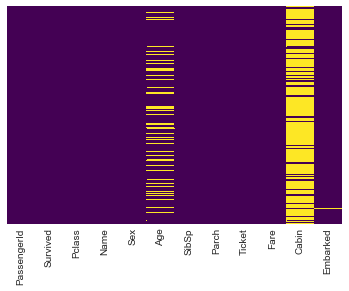

In [11]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

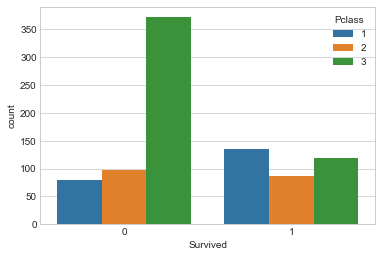

In [18]:
sns.countplot(x = 'Survived', data = train, hue='Pclass')

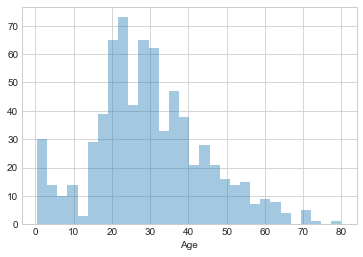

In [24]:
sns.distplot(train['Age'].dropna(), kde=False, bins = 30)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


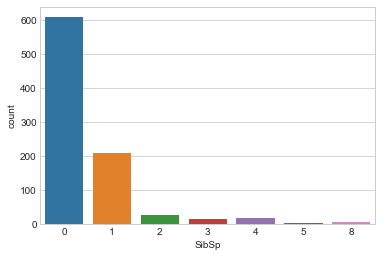

In [28]:
sns.countplot(train['SibSp'])

In [35]:
train['Fare'].iplot(kind='hist', bins=30)

**
Cleaning Data
**

Average age of people in class 1:  38
Average age of people in class 2:  29
Average age of people in class 3:  25


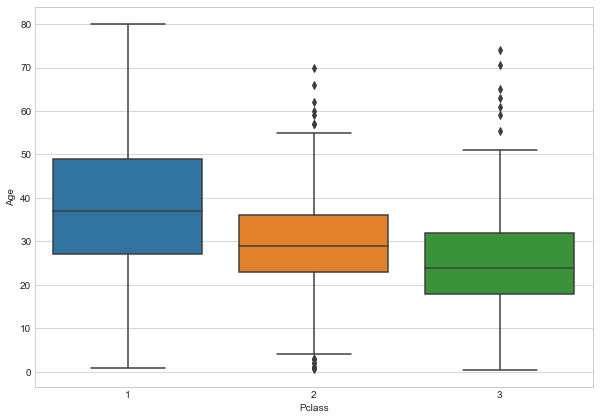

In [59]:
# need to replace missing age value
# we can do it by replacing null value by its average value and to get accurate value of age, we can get categorize data by class
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Pclass', y='Age', data = train)
print('Average age of people in class 1: ', int(train[train['Pclass'] == 1]['Age'].mean()))
print('Average age of people in class 2: ', int(train[train['Pclass'] == 2]['Age'].mean()))
print('Average age of people in class 3: ', int(train[train['Pclass'] == 3]['Age'].mean()))

In [89]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return int(train[train['Pclass'] == 1]['Age'].mean())
        elif Pclass == 2:
            return int(train[train['Pclass'] == 2]['Age'].mean())
        else:
            return int(train[train['Pclass'] == 3]['Age'].mean())
        
    else:
        return Age

In [90]:
# replaces all missing value in age
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

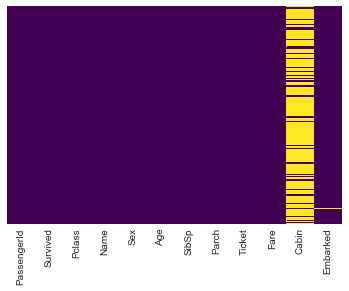

In [91]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [92]:
# dropped cabin column as it is not feasible to replace values due to many missing values
train.drop('Cabin', axis=1,inplace = True)

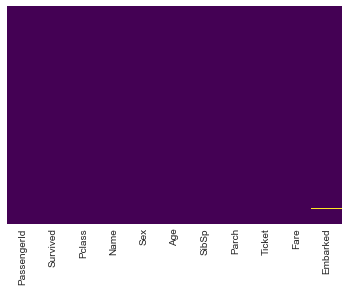

In [93]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [94]:
# dropping any other minor number of missing values
train.dropna(inplace=True)

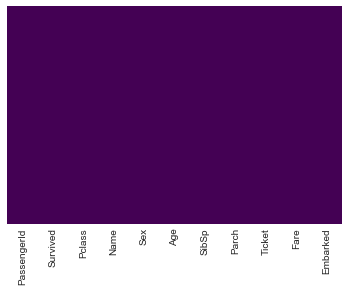

In [95]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False)

In [98]:
# converting categories in numerical or binary values
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [102]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [105]:
# adding new columns to original train data
train = pd.concat([train, sex, embark], axis = 1)

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [117]:
train.drop(['Sex', 'Ticket', 'Name', 'Embarked'], axis = 1, inplace=True)

ValueError: labels ['Sex' 'Ticket' 'Name' 'Embarked'] not contained in axis

In [115]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [118]:
train.drop('PassengerId', axis=1, inplace=True)

In [119]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
